<a href="https://colab.research.google.com/github/shravankumargulvadi/Assignment-9/blob/master/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Observations
The following observations were made from the two Class activation visualizations created ie, one without the Cutout(image augmentation) and the other with the Cutout.

1. Without the cutout data augmentation the activations appear diffused and spread across the entire image even in areas irrelevant to the classification decision.
2. But with the implementation of cutout, the activation has become 'Overly' focussed and seems to be making decisions from limited part of the image/object. For ex: in the visualization of the car the network seems to be focussing on only the rear part of the car instead of the entire car chassis. The visualization seems to be suggesting overfitting. On the other hand validation accuracy has marginally increased from 85.15% to 85.41% where as the training accuracy has dropped. Which clearly suggests that the data augmentation has regularized the network as expected. This suggests a problem in visualization or my interpretation of it.

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels)) #np.unique returns the unique values in the array in a sorted order ie, np.unique[1,1,2,2,2,3]=[1,2,3]

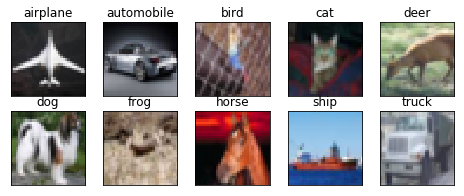

In [66]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
for i in range(50000):
 mean=np.mean(train_features[i], axis=0)
 sd=np.std(train_features[i])
 train_features[i]= (train_features[i]-mean)/sd

In [0]:
for i in range(10000):
 mean=np.mean(test_features[i], axis=0)
 sd=np.std(test_features[i])
 test_features[i]= (test_features[i]-mean)/sd

In [11]:
model = Sequential()
model.add(Convolution2D(16, 3, 3, input_shape=(32, 32, 3), border_mode='same')) #RF=3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, border_mode='same')) #RF=5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Convolution2D(64, 3, 3, border_mode='same')) #RF=7x7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(128, 3, 3, border_mode='same')) #RF=9x9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Convolution2D(256, 3, 3, border_mode='same')) #RF=11x11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))



model.add(Convolution2D(32, 1, 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #RF=22x22



model.add(Convolution2D(64, 3, 3, border_mode='same')) #RF=24X24
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Convolution2D(128, 3, 3, border_mode='same')) #RF=26X26
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Convolution2D(128, 3, 3, border_mode='same')) #RF=28x28
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Convolution2D(256, 3, 3, border_mode='same', name='logit')) #RF=30x30
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Convolution2D(10, 1, 1, border_mode='same')) #RF=32x32
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0629 15:14:40.331542 140419236583296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0629 15:14:40.352435 140419236583296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0629 15:14:40.355095 140419236583296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0629 15:14:40.381854 140419236583296 deprecation_wrapper.py:119] From /usr/local/lib/python3.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 57s 147ms/step - loss: 1.3902 - acc: 0.5016 - val_loss: 1.4078 - val_acc: 0.5229
Epoch 2/50
390/390 [==============================] - 54s 137ms/step - loss: 1.0032 - acc: 0.6430 - val_loss: 1.1845 - val_acc: 0.6031
Epoch 3/50
390/390 [==============================] - 54s 137ms/step - loss: 0.8283 - acc: 0.7103 - val_loss: 1.0708 - val_acc: 0.6517
Epoch 4/50
390/390 [==============================] - 54s 138ms/step - loss: 0.7275 - acc: 0.7471 - val_loss: 1.0658 - val_acc: 0.6662
Epoch 5/50
390/390 [==============================] - 54s 138ms/step - loss: 0.6614 - acc: 0.7715 - val_loss: 0.8557 - val_acc: 0.7198
Epoch 6/50
390/390 [==============================] - 54s 138ms/step - loss: 0.6048 - acc: 0.7905 - val_loss: 0.8099 - val_acc: 0.7323
Epoch 7/50
390/390 [==============================] - 54s 138ms/step - loss: 0.5630 - acc: 0.8064 - val_loss: 0.7619 - val_acc: 0.7512
Epoch 8/50
390/390 [==============================] - 5

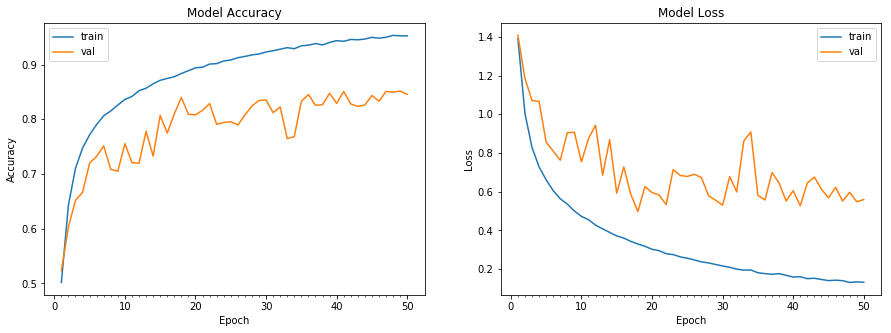

Accuracy on test data is: 84.55


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Result without cutout implementation: Max Validation accuracy of 85.15% achieved.

## Creating Class Activation Maps

In [0]:
im = im.reshape(1, 32, 32, 3)
#plt.imshow(im)
preds = model.predict(im)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer('logit')

In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([im])
for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

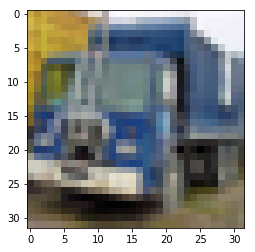

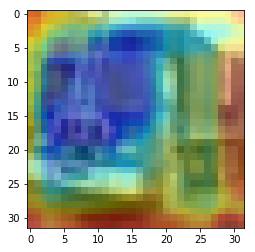

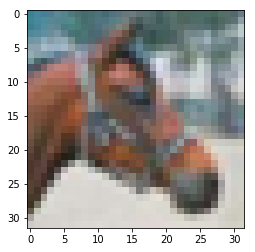

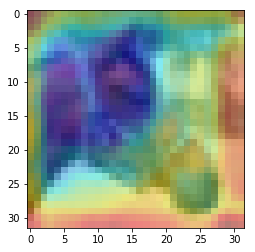

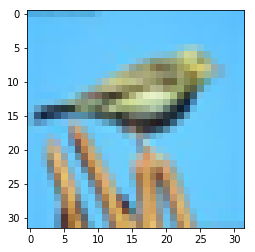

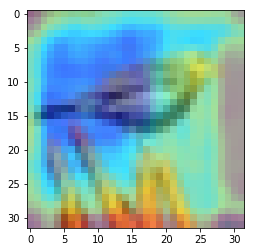

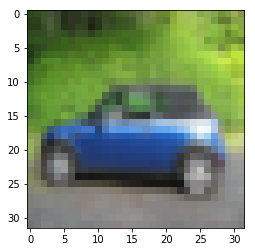

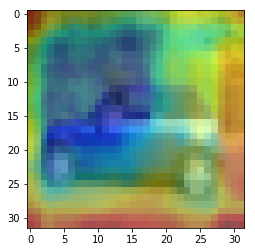

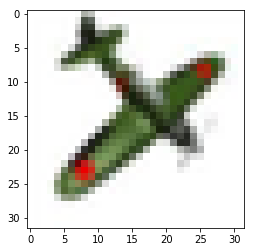

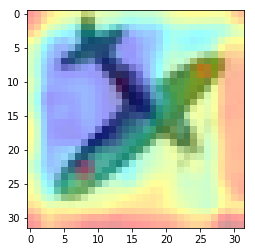

In [29]:
images=[test_features[14], test_features[17], test_features[67], test_features[82], test_features[98]]
for i in range (5):
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    
    img = images[i]
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    plt.imshow(img)
    plt.show()
    plt.imshow(superimposed_img)
    plt.show()


## Cutout Implementation:

In [0]:
def cutout(img):
        """
        Args:
            img (Tensor): Tensor image of size (C, H, W).
        Returns:
            Tensor: Image with n_holes of dimension length x length cut out of it.
        """
        n_holes=1
        length=8
        img= np.array(img)
        h = img.shape[0]
        w = img.shape[1]
        

        mask = np.ones((h, w, 3), np.float32)

        for n in range(n_holes):
            y = np.random.randint(h)
            x = np.random.randint(w)

            y1 = int(np.clip(y - length // 2, 0, h))
            y2 = int(np.clip(y + length // 2, 0, h))
            x1 = int(np.clip(x - length // 2, 0, w))
            x2 = int(np.clip(x + length // 2, 0, w))

            mask[y1: y2, x1: x2] = 0.
            #print(mask, img.shape, y, x )

      
       
        img = img * mask
       
   
      

        return img

## Verification

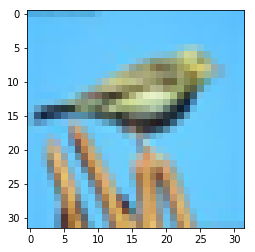

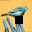

In [70]:
new_image= cutout(test_features[67])
plt.imshow(test_features[67])
plt.show()
cv2_imshow(new_image)



In [51]:
model = Sequential()
model.add(Convolution2D(16, 3, 3, input_shape=(32, 32, 3), border_mode='same')) #RF=3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, border_mode='same')) #RF=5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Convolution2D(64, 3, 3, border_mode='same')) #RF=7x7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(128, 3, 3, border_mode='same')) #RF=9x9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Convolution2D(256, 3, 3, border_mode='same')) #RF=11x11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))



model.add(Convolution2D(32, 1, 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #RF=22x22



model.add(Convolution2D(64, 3, 3, border_mode='same')) #RF=24X24
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Convolution2D(128, 3, 3, border_mode='same')) #RF=26X26
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Convolution2D(128, 3, 3, border_mode='same')) #RF=28x28
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Convolution2D(256, 3, 3, border_mode='same', name='logit')) #RF=30x30
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Convolution2D(10, 1, 1, border_mode='same')) #RF=32x32
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Con

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 59s 151ms/step - loss: 1.4284 - acc: 0.4837 - val_loss: 1.7790 - val_acc: 0.4413
Epoch 2/50
390/390 [==============================] - 55s 140ms/step - loss: 1.0654 - acc: 0.6210 - val_loss: 1.1944 - val_acc: 0.5825
Epoch 3/50
390/390 [==============================] - 54s 138ms/step - loss: 0.9135 - acc: 0.6768 - val_loss: 1.1658 - val_acc: 0.6137
Epoch 4/50
390/390 [==============================] - 54s 138ms/step - loss: 0.8047 - acc: 0.7194 - val_loss: 1.0581 - val_acc: 0.6584
Epoch 5/50
390/390 [==============================] - 54s 138ms/step - loss: 0.7395 - acc: 0.7430 - val_loss: 0.8446 - val_acc: 0.7138
Epoch 6/50
390/390 [==============================] - 54s 137ms/step - loss: 0.6805 - acc: 0.7625 - val_loss: 0.9116 - val_acc: 0.6951
Epoch 7/50
390/390 [==============================] - 53s 137ms/step - loss: 0.6350 - acc: 0.7804 - val_loss: 0.9846 - val_acc: 0.7034
Epoch 8/50
390/390 [==============================] - 5

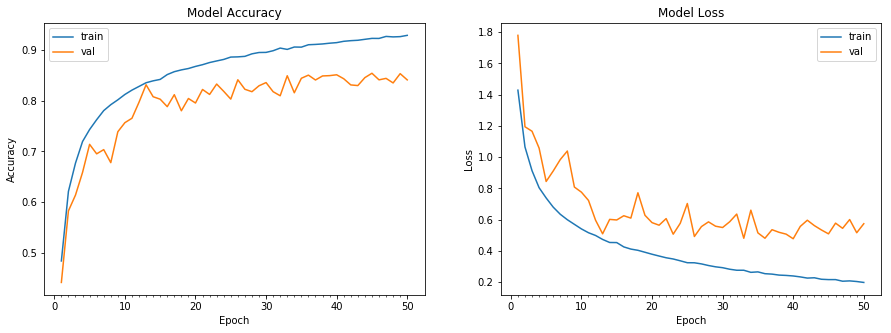

Accuracy on test data is: 84.10


In [54]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False, preprocessing_function=cutout)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Result without cutout implementation: Max Validation accuracy of 85.41% achieved.

In [0]:
im = im.reshape(1, 32, 32, 3)
#plt.imshow(im)
preds = model.predict(im)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer('logit')

In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([im])
for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

(32, 32, 3) (32, 32, 3)


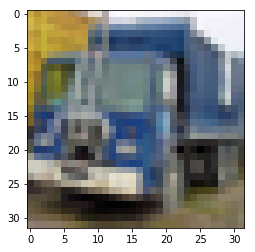

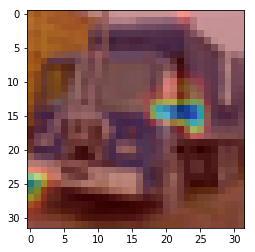

(32, 32, 3) (32, 32, 3)


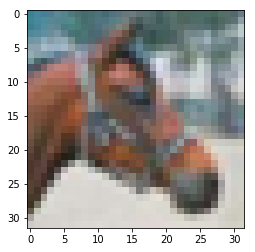

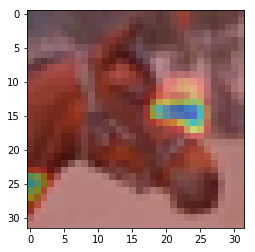

(32, 32, 3) (32, 32, 3)


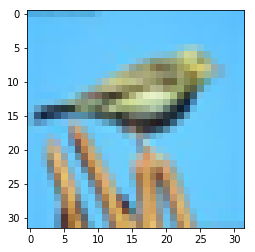

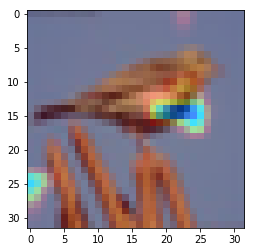

(32, 32, 3) (32, 32, 3)


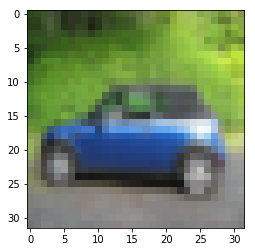

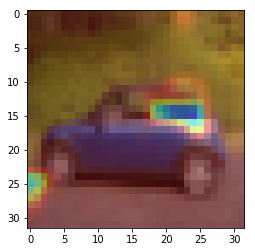

(32, 32, 3) (32, 32, 3)


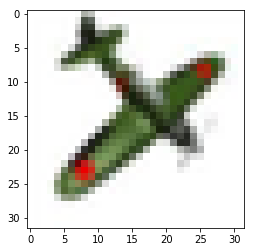

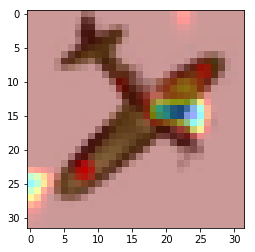

In [69]:
images=[test_features[14], test_features[17], test_features[67], test_features[82], test_features[98]]
for i in range (5):
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    
    img = images[i]
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    print(img.shape, heatmap.shape)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    
    plt.imshow(img)
    plt.show()
    plt.imshow(superimposed_img)
    plt.show()
